# imports and read form csv

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
rain = pd.read_csv('data/seattleWeather_1948-2017.csv')


# basic info

In [43]:
rain.shape

(25551, 5)

In [44]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [45]:
rain.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [46]:
rain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [47]:
rain.isna().sum() 

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

# preproces Data

### We can see that are some null values in RAIN and PRCP colums.
### We can afford to drop them because there are only 3 null values.

In [48]:
rain = rain.dropna(axis=0).reset_index()

### also we can drop the index colum

In [49]:
rain = rain.drop('index', axis = 1)


### Now we will split the date to 3 colums - day , month and years.

In [50]:
rain['DATE'] = pd.to_datetime(rain['DATE'])# convert to datetime object
rain['year'] = rain['DATE'].dt.year
rain['month'] = rain['DATE'].dt.month
rain['day'] = rain['DATE'].dt.day
rain['TAVG'] = (rain['TMIN'] + rain['TMAX'])/2
rain = rain.drop('DATE', axis =1)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG
0,0.47,51,42,True,1948,1,1,46.5
1,0.59,45,36,True,1948,1,2,40.5
2,0.42,45,35,True,1948,1,3,40.0
3,0.31,45,34,True,1948,1,4,39.5
4,0.17,45,32,True,1948,1,5,38.5
...,...,...,...,...,...,...,...,...
25543,0.00,49,34,False,2017,12,10,41.5
25544,0.00,49,29,False,2017,12,11,39.0
25545,0.00,46,32,False,2017,12,12,39.0
25546,0.00,48,34,False,2017,12,13,41.0


### convert RAIN to 0 or 1.

In [51]:
rain['RAIN'] = rain['RAIN'].astype(np.int)
rain

,PRCP,TMAX,TMIN,RAIN,year,month,day,TAVG
0,0.47,51,42,1,1948,1,1,46.5
1,0.59,45,36,1,1948,1,2,40.5
2,0.42,45,35,1,1948,1,3,40.0
3,0.31,45,34,1,1948,1,4,39.5
4,0.17,45,32,1,1948,1,5,38.5
...,...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10,41.5
25544,0.00,49,29,0,2017,12,11,39.0
25545,0.00,46,32,0,2017,12,12,39.0
25546,0.00,48,34,0,2017,12,13,41.0


## now we have all the relevant data in numerical

In [97]:
# Split Data
y = rain['TAVG']
x = rain.drop(['TAVG','TMAX','TMIN'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)

# EDA

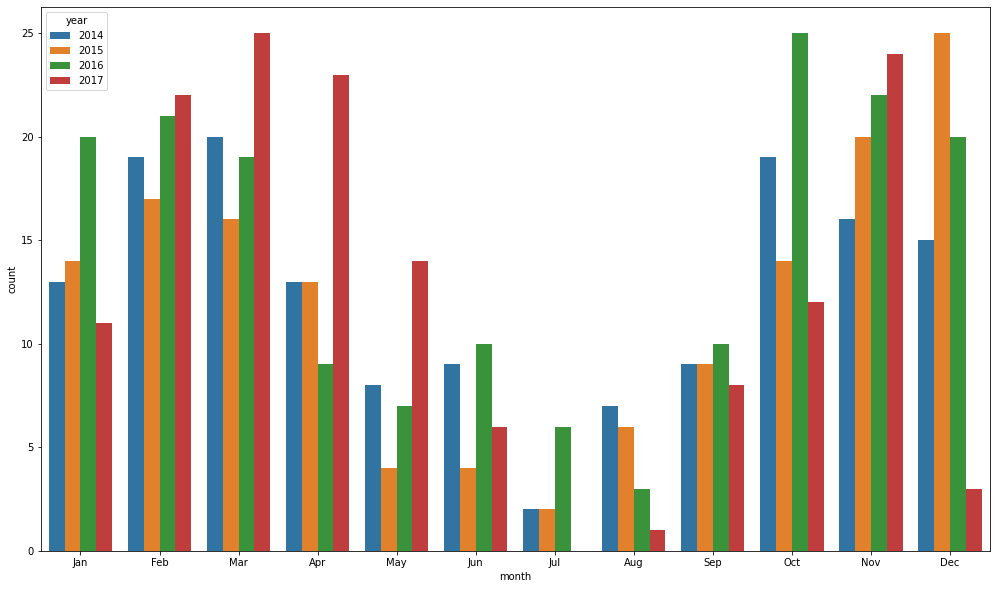

In [98]:
plt.figure(figsize=(17,10))
sns.countplot(data = rain[(rain['RAIN'] == 1) & (rain['year'] >= 2014)], x='month', hue='year')
plt.xticks(ticks=np.arange(0,12), labels=[ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.show()

In [99]:
LR = LinearRegression().fit(x_train, y_train)
KNN = KNeighborsRegressor().fit(x_train, y_train)

# model

In [100]:
print(LR.score(x_test, y_test))
print(KNN.score(x_test, y_test))

0.12082961820142502
0.7844987794429242


In [124]:
y_test.iloc[4]

60.5

In [128]:
KNN.predict([[0.17 , 1 , 2020 ,1 , 5]])



array([31.5])

In [89]:
y_train

3975     43.5
25065    82.0
5337     62.0
14188    48.0
13176    49.0
         ... 
10955    41.5
17289    55.5
5192     43.5
12172    62.5
235      59.5
Name: TAVG, Length: 17883, dtype: float64

In [129]:
clf = KNeighborsRegressor()
clf.fit(scal_x_train , y_train)
clf.score(scal_x_test, y_test)

0.7861697694985387

In [104]:
scal_x_train

,PRCP,RAIN,year,month,day
0,-0.443981,-0.866100,-0.027034,-1.018781,0.374906
1,6.464681,1.154602,-0.225145,0.722055,0.715822
2,-0.443981,-0.866100,-1.562393,1.592473,-0.534204
3,0.351562,1.154602,-1.265227,-1.308920,1.170377
4,0.309691,1.154602,0.715881,-1.018781,0.147628
...,...,...,...,...,...
20433,1.147105,1.154602,-0.274673,1.592473,1.511293
20434,-0.443981,-0.866100,0.616826,-0.438502,-1.443314
20435,-0.234628,1.154602,-1.017588,-1.018781,0.488544
20436,-0.443981,-0.866100,-0.076562,-0.728642,1.511293
